### This notebook should be run in the same directory that contains patient folders.
### Example: 
- ecog_data_analysis *(folder)*
    - All analysis json files with parameters (one per patient and one per task)
    - ecogtools_demo *(jupter notebook)*
    - patient_2002 *(folder)*
        - edf file *(edf)*
        - merged trigger *(csv)*
        - behavioral_data_2002 *(folder)*
            - ToM_Loc_2002.json
 
### Image files will be saved in new folder in patient folder (ex. patient_2002)

In [1]:
from __future__ import print_function

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne

import ecogtools

In [2]:
%matplotlib inline

In [3]:
patient_num = "2002"

# ToM_Loc Task

In [4]:
data = ecogtools.ToM_Localizer(patient_num)

Extracting edf Parameters from patient_2002/john_2002.edf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


In [5]:
data.remove_irrelevant_channels()

In [6]:
channels_of_interest = ['RTG40']
data.initialize_epochs_object(channels_of_interest, tmin=-3., tmax=5., baseline=(-1., 0))

60 matching events found
0 projection items activated
Loading data for 60 events and 16001 original time points ...
0 bad epochs dropped


In [7]:
evoked_belief = data.create_evoked("b/quest_start")
evoked_photo = data.create_evoked("p/quest_start")

In [8]:
evoked_combined = mne.combine_evoked(data.evoked_list, weights=[1, -1])

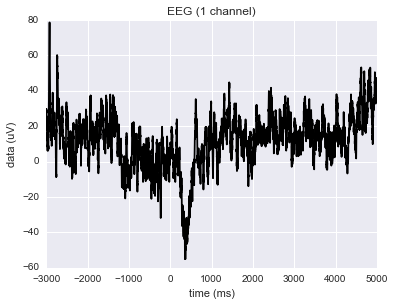

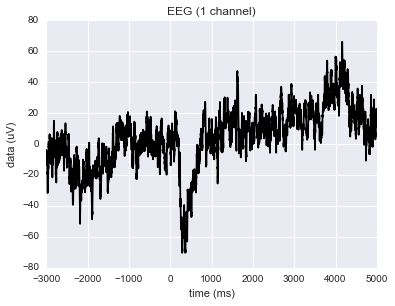

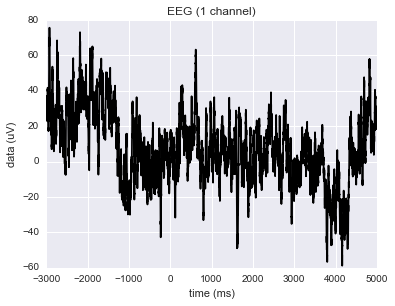

In [9]:
evoked_belief.plot()
evoked_photo.plot()
evoked_combined.plot();

In [46]:
freqs = np.linspace(1., 80., 25)
n_cycles = freqs/2.

In [42]:
power1, itc1 = data.compute_power('b/quest_start', freqs=freqs, n_cycles=n_cycles)

power2, itc2 = data.compute_power('p/quest_start', freqs=freqs, n_cycles=n_cycles)

Applying baseline correction (mode: ratio)


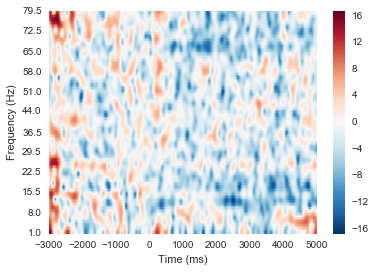

In [43]:
power1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


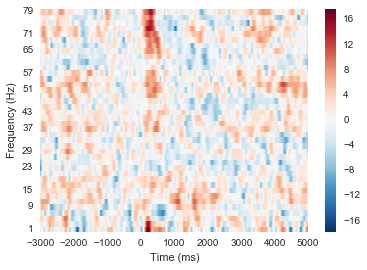

In [27]:
power2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

In [28]:
combined = data.compute_diff_power(power1, power2)

No baseline correction applied


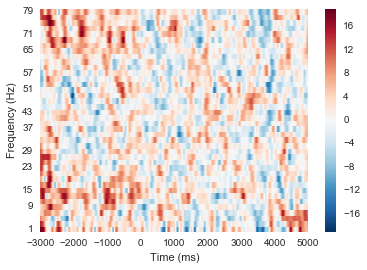

In [29]:
combined.plot([0], dB=True);

In [31]:
freqs = np.linspace(80., 150., 50.)
n_cycles = freqs/2.

In [32]:
power1, itc1 = data.compute_power('b/quest_start', freqs=freqs, n_cycles=n_cycles)

power2, itc2 = data.compute_power('p/quest_start', freqs=freqs, n_cycles=n_cycles)

Applying baseline correction (mode: ratio)


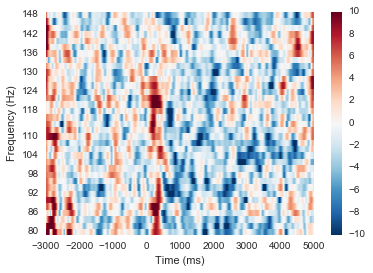

In [33]:
power1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


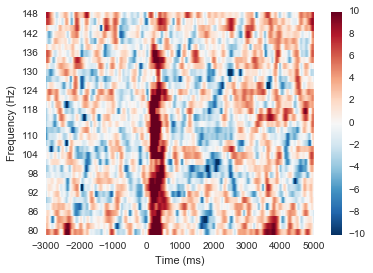

In [34]:
power2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

In [35]:
combined = data.compute_diff_power(power1, power2)

No baseline correction applied


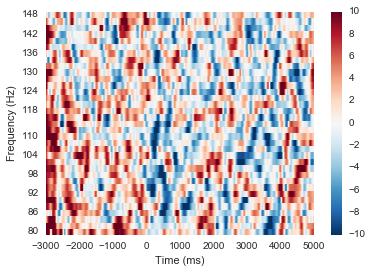

In [36]:
combined.plot([0], dB=True);

# TOM 2010 TASK

In [22]:
data = ecogtools.ToM_2010(patient_num)

Extracting edf Parameters from patient_2002/john_2002.edf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


In [23]:
channels_of_interest = ['RTG31']
data.initialize_epochs_object(channels_of_interest)

81 matching events found
0 projection items activated
Loading data for 81 events and 12001 original time points ...
0 bad epochs dropped


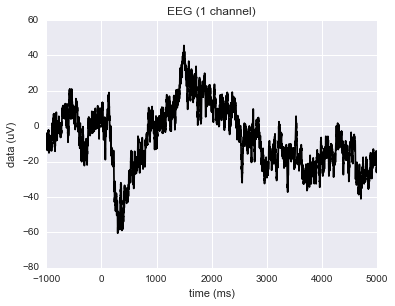

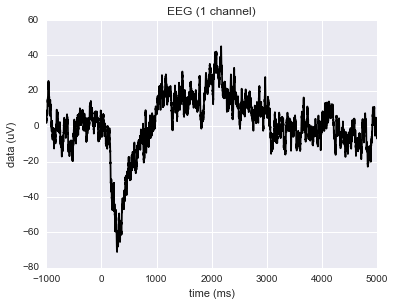

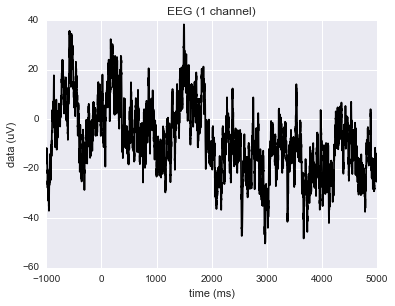

In [24]:
evoked_mental = data.create_evoked("mental/quest_start")
evoked_physical = data.create_evoked("physical/quest_start")

evoked_comb_tom = mne.combine_evoked(data.evoked_list, weights=[1, -1])

evoked_mental.plot()
evoked_physical.plot()
evoked_comb_tom.plot();

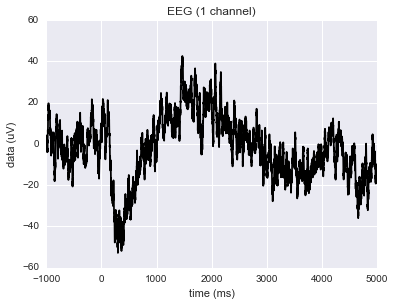

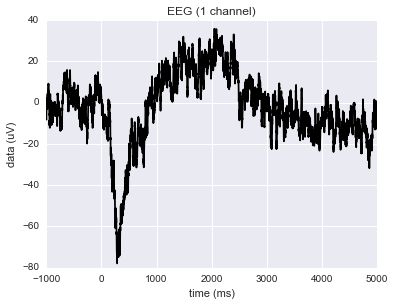

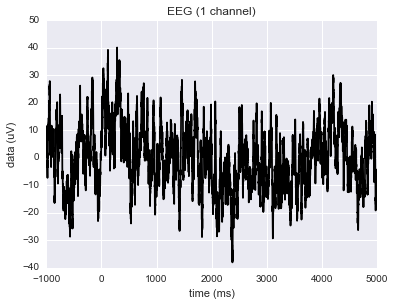

In [25]:
evoked_expected = data.create_evoked("expected/quest_start")
evoked_unexpected = data.create_evoked("unexpected/quest_start")

evoked_comb_attn = mne.combine_evoked(data.evoked_list[2:], weights=[1, -1])

evoked_expected.plot()
evoked_unexpected.plot()
evoked_comb_attn.plot();

In [26]:
freqs = np.linspace(1., 80., 50)
n_cycles = freqs/2.

In [27]:
power1, itc1 = data.compute_power('mental/quest_start', freqs=freqs, n_cycles=n_cycles)

power2, itc2 = data.compute_power('physical/quest_start', freqs=freqs, n_cycles=n_cycles)

power3, itc3 = data.compute_power('expected/quest_start', freqs=freqs, n_cycles=n_cycles)

power4, itc4 = data.compute_power('unexpected/quest_start', freqs=freqs, n_cycles=n_cycles)

Applying baseline correction (mode: ratio)


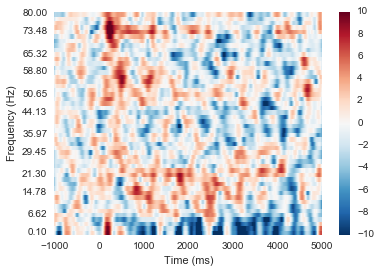

In [28]:
power1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


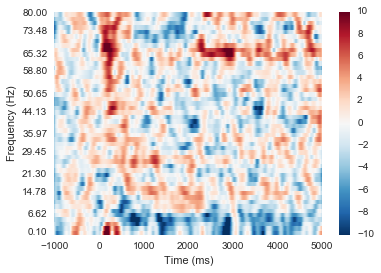

In [29]:
power2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


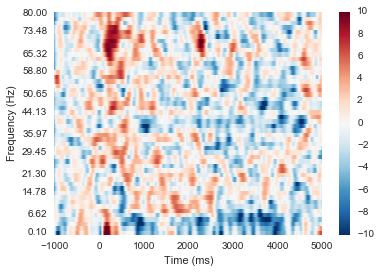

In [30]:
power3.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


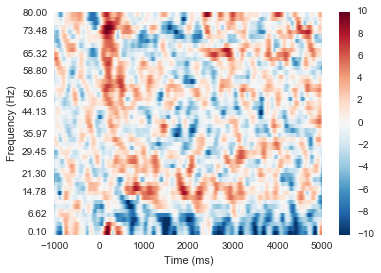

In [31]:
power4.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

In [32]:
combined1 = data.compute_diff_power(power1, power2)

combined2 = data.compute_diff_power(power3, power4)

### Mental - physical

No baseline correction applied


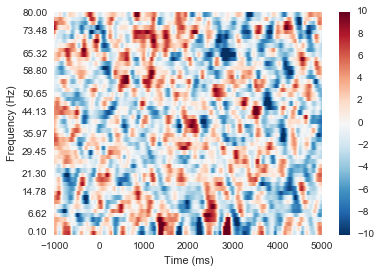

In [33]:
combined1.plot([0], dB=True);

### Expected - unexpected

No baseline correction applied


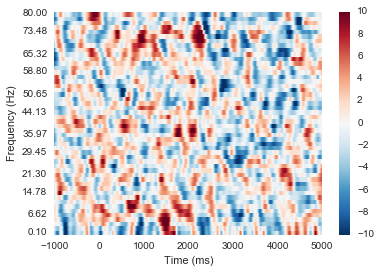

In [34]:
combined2.plot([0], dB=True);

No baseline correction applied


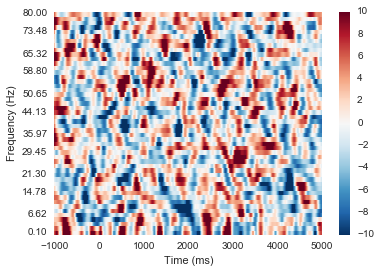

In [36]:
combined_combined = data.compute_diff_power(combined1, combined2)
combined_combined.plot([0], dB=True);

# Trying new things

In [44]:
channels_of_interest = ['RTG40']
data.initialize_epochs_object(channels_of_interest, tmin=-3., tmax=8., baseline=(-1., 0))

60 matching events found
0 projection items activated
Loading data for 60 events and 22001 original time points ...
0 bad epochs dropped


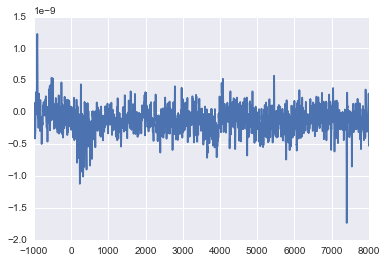

In [47]:
freqs = np.linspace(80, 150)

n_cycles = 3

power1 = mne.time_frequency.tfr_morlet(data.epochs['b/quest_start'], freqs, n_cycles, return_itc=False, average=True)
power2 = mne.time_frequency.tfr_morlet(data.epochs['p/quest_start'], freqs, n_cycles, return_itc=False, average=True)
power = power1 - power2

average = np.mean(power.data, axis=1)

average = np.squeeze(average)

time = np.linspace(-3000, 8000, average.shape[0])

baseline_mean = np.mean(average[4000:6000])

baseline_mean

baselined = average-baseline_mean

newb = baselined[4000:]
newt = time[4000:]

plt.plot(newt, newb)